In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
# text_df.to_csv('text_zigbang_0516.csv', encoding='euc-kr', index=False)


In [ ]:
def text_sgg_aggregated():
  text_df = pd.read_csv('/content/drive/MyDrive/1조(semi)_데이터분석엔지니어24회차/nlp/text_zigbang_0516_updated.csv', encoding='euc-kr')
  stop_words = ['등', '및', '비', '실', '무엇', '요즘', '직접', '개', '변','분','수','락','내','개월','번','입', '곳','확인', '리','이장','현재','조절','모두','총','전용','후','대수','매우', '등등','사항','정말','몸','호실','이','시', '완료','각종', '평수','다수', '실제', '편','톤','중','보시', '완전','구', '제','더','자도','위','언제',
  '매물', '등록', '위치', '직방', '방', '사진', '권', '전입', '층', '신고', '룸', '평', '시스템','부동산', '불가', '타입', '미사', '이용', '공간', '인접', '구조', '주변', 
  '동안', '주하', '카', '만오', '이세', '조정은', '칸', '책정', '철', '종류', '기정', '분포', '화공', '제어', '이크', '상기', '료등', '욥', '리모', '두운', '아이디', '한눈', '순간', '원활', '규약', '정석', '진임', '평의', '질', '성의껏', '유사', '선물', '유명', '타시기', '더탑', '인증', '임박', '자율', '분석', '브', '멀티', '콤비', '대내', '방기', '로움', '계산서', '지출', '톡', '등록증', '푸른', '앤', '읍니', '가능', '포함', '업로드', '매일',
  '박자', '빅사', '부공', '장인근', '두루', '고로', '패드', '얼마나', '평이', '액자', '주지', '임의', '실매'
  ]

  FEATURE_POS = ["Noun"]
  documents = []
  text_df['text'] = ""

  for index, row in text_df.iterrows():
      morphs = []
      token_row = row['token']
      token_row = token_row.strip('[').strip(']').strip('(').strip(')').split("), (")

      for item in token_row:
          item = item.split(', ')
          word = item[0].strip("'")
          pos = item[-1].strip("'")

          if pos not in FEATURE_POS:
              continue

          if word not in stop_words:
              # Update the 'text' column for the current row
              text_df.at[index, 'text'] += word + ' '

  #시군구별로 합치기
  text_sgg_aggregated = text_df.groupby('sgg_cd')['text'].agg(lambda x: ' '.join(x)).reset_index()
  text_sgg_aggregated.columns = ['sgg_cd', 'text']
  text_sgg_aggregated = text_sgg_aggregated.astype({'sgg_cd':int})
  return text_sgg_aggregated


In [ ]:
def sggemd_word():
  text_df = pd.read_csv('/content/drive/MyDrive/1조(semi)_데이터분석엔지니어24회차/nlp/text_zigbang_0516_updated.csv', encoding='euc-kr')
  stop_words = ['등', '및', '비', '실', '무엇', '요즘', '직접', '개', '변','분','수','락','내','개월','번','입', '곳','확인', '리','이장','현재','조절','모두','총','전용','후','대수','매우', '등등','사항','정말','몸','호실','이','시', '완료','각종', '평수','다수', '실제', '편','톤','중','보시', '완전','구', '제','더','자도','위','언제',
  '매물', '등록', '위치', '직방', '방', '사진', '권', '전입', '층', '신고', '룸', '평', '시스템','부동산', '불가', '타입', '미사', '이용', '공간', '인접', '구조', '주변', 
  '동안', '주하', '카', '만오', '이세', '조정은', '칸', '책정', '철', '종류', '기정', '분포', '화공', '제어', '이크', '상기', '료등', '욥', '리모', '두운', '아이디', '한눈', '순간', '원활', '규약', '정석', '진임', '평의', '질', '성의껏', '유사', '선물', '유명', '타시기', '더탑', '인증', '임박', '자율', '분석', '브', '멀티', '콤비', '대내', '방기', '로움', '계산서', '지출', '톡', '등록증', '푸른', '앤', '읍니', '가능', '포함', '업로드', '매일',
  '박자', '빅사', '부공', '장인근', '두루', '고로', '패드', '얼마나', '평이', '액자', '주지', '임의', '실매'
  ]

  FEATURE_POS = ["Noun"]
  documents = []
  text_df['text'] = ""

  for index, row in text_df.iterrows():
      morphs = []
      token_row = row['token']
      token_row = token_row.strip('[').strip(']').strip('(').strip(')').split("), (")

      for item in token_row:
          item = item.split(', ')
          word = item[0].strip("'")
          pos = item[-1].strip("'")

          if pos not in FEATURE_POS:
              continue

          if word not in stop_words:
              # Update the 'text' column for the current row
              text_df.at[index, 'text'] += word + ' '

  #읍면동 별로 합치기
  text_emd_aggregated = text_emd_aggregated.astype({'emd_cd_2022':int})
  text_emd_aggregated = text_df.groupby('emd_cd_2022')['text'].agg(lambda x: ' '.join(x)).reset_index()
  text_emd_aggregated.columns = ['emd_cd_2022', 'text']
  return text_emd_aggregated


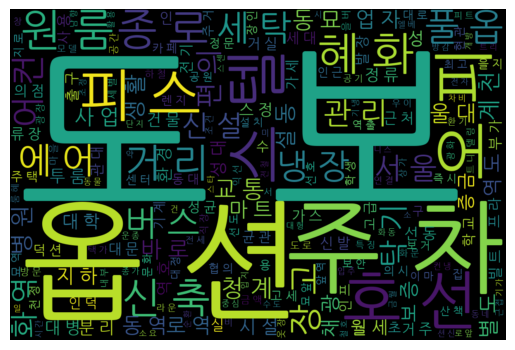

In [ ]:
# import pandas as pd
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# FONT_PATH ="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# # Assuming you have a DataFrame 'text_df' with a column 'text' containing space-separated text

# # Concatenate all the text from the 'text' column into a single string
# text = ' '.join(text_sgg_aggregated['text'].iloc[0])

# # Generate the word cloud
# wordcloud = WordCloud(font_path=FONT_PATH, width=600, height=400, scale=2.0, max_font_size=250).generate(text)

# # Plot the word cloud
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [ ]:
# 시군구 코드 입력하면 워드 클라우드 그려주는 함수
def get_sgg_wordcloud(sgg_cd):
  FONT_PATH ="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
  text_sgg_aggregated=text_sgg_aggregated()

  # Assuming you have a DataFrame 'text_df' with a column 'text' containing space-separated text

  # Concatenate all the text from the 'text' column into a single string
  text = ' '.join(text_sgg_aggregated.loc[text_sgg_aggregated['sgg_cd'] == sgg_cd, 'text'])

  # Generate the word cloud
  wordcloud = WordCloud(font_path=FONT_PATH, width=600, height=400, scale=2.0, max_font_size=250).generate(text)

  # Plot the word cloud
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()


# 읍면동 코드 입력하면 워드 클라우드 그려주는 함수
def get_emd_wordcloud(emd_cd_2022):
  FONT_PATH ="/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
  text_emd_aggregated=text_emd_aggregated()
  # Assuming you have a DataFrame 'text_df' with a column 'text' containing space-separated text

  # Concatenate all the text from the 'text' column into a single string
  text = ' '.join(text_emd_aggregated.loc[text_emd_aggregated['emd_cd_2022'] == emd_cd_2022, 'text'])

  # Generate the word cloud
  wordcloud = WordCloud(font_path=FONT_PATH, width=600, height=400, scale=2.0, max_font_size=250).generate(text)

  # Plot the word cloud
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

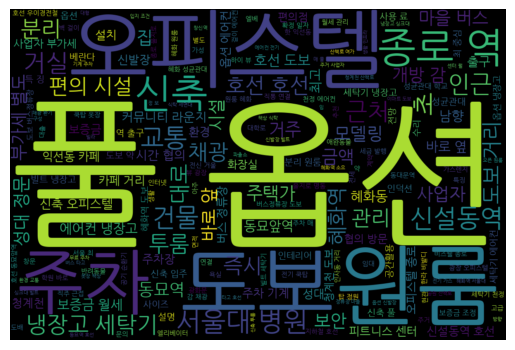

In [ ]:
get_sgg_wordcloud(11010)